In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
plt.style.use('ggplot')

In [6]:
import nltk

In [9]:
#read data
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/seantiment.csv')

In [10]:
df

,SCORE,REVIEWS,DETAIL
0,1,GOOD,PRODUCT IS TOTALLY SATISFED
1,2,BAD,Quality of product is not good
2,2,better,product material was good but cost was more
3,1,Excellent,product was worth it


In [11]:
print(df.shape)

(4, 3)


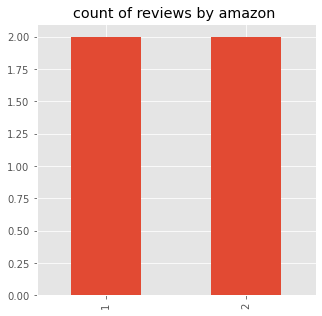

In [12]:
#data visalization using matplotlib
ax= df['SCORE'].value_counts().sort_index().plot(kind='bar',title='count of reviews by amazon ',
                                           figsize=(5, 5))

In [13]:
ax.set_xlabel('review amazon')

Text(0.5, 3.200000000000002, 'review amazon')

In [16]:
#nltk
example=df['DETAIL'][2]
print(example)

product material was good but cost was more 


In [17]:
#TOKENIZATION
tokens= nltk.word_tokenize(example)
tokens

['product', 'material', 'was', 'good', 'but', 'cost', 'was', 'more']

In [18]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
#parts of speech tagging
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('product', 'NN'),
 ('material', 'NN'),
 ('was', 'VBD'),
 ('good', 'JJ'),
 ('but', 'CC'),
 ('cost', 'NN'),
 ('was', 'VBD'),
 ('more', 'RBR')]

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [21]:
from tqdm.notebook import tqdm

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
sia= SentimentIntensityAnalyzer()

In [24]:
sia

In [25]:
sia.polarity_scores('i m sad')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}

In [26]:
example

'product material was good but cost was more '

In [27]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.2382}

In [29]:
#run the polarity score on the whole dataset
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['REVIEWS']
    score= row['SCORE']
    res[text]= sia.polarity_scores('DETAIL')

  0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
res

{'GOOD': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'BAD ': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'better': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Excellent ': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}